In [57]:
# Importazione delle librerie necessarie
import pandas as pd # dataframes
import numpy as np  # calcolo
import seaborn as sns # graphics
import os
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
from textblob import TextBlob
import datetime

In [58]:
csv_filename = r'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'
features = ["reviews.text","reviews.rating"]

In [59]:
data=pd.read_csv(csv_filename)

In [60]:
data.head(10)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
5,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This make an excellent ebook reader. Don't exp...,Good ebook,rmwarriors,https://www.newegg.com/Product/Product.aspx%25...
6,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,187043823.0,0,5,https://redsky.target.com/groot-domain-api/v1/...,"I ordered this for my daughter, as I have the ...",Light Weight - Makes a world of difference whe...,LexieCrews,https://www.newe

In [61]:
data=pd.DataFrame(data)
col=features
data=data.loc[:,col]
data.head(5)

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [62]:
# As discuss above that we would not include star_rating with 3 
data=data[data[features[1]]!=3]

In [63]:
data[features[1]].value_counts()

5    3478
4    1208
1      63
2      54
Name: reviews.rating, dtype: int64

In [64]:
# So we are creting new column based on our condition in pythonic way !
data["label"]=list(map(lambda x: 1 if(x>3) else 0, data[features[1]]))

In [65]:
data

,reviews.text,reviews.rating,label
1,This kindle is light and easy to use especiall...,5,1
2,Didnt know how much i'd use a kindle so went f...,4,1
3,I am 100 happy with my purchase. I caught it o...,5,1
4,Solid entry level Kindle. Great for kids. Gift...,5,1
5,This make an excellent ebook reader. Don't exp...,5,1
...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1
4996,This tablet is the perfect size and so easy to...,5,1
4997,Purchased this for my son. Has room to upgrade...,4,1
4998,I had some thoughts about getting this for a 5...,5,1


In [66]:
data['label'].value_counts()

1    4686
0     117
Name: label, dtype: int64

In [67]:
def clean_text(text):
    """
    Pulisce una singola recensione rimuovendo etichette iniziali, punteggiatura,
    spazi extra e trasformando il testo in minuscolo per non dar problemi e non
    dover gestire sia Lowercase che Uppercase separatemente.
    
    Args:
        text (str): La recensione da pulire.
    
    Returns:
        str: La recensione pulita.
    """
    text = re.sub(r'^[^ ]+ ', '', text)  # Rimuovi label iniziale
    text = re.sub(r'[^\w\s]', '', text)  # Rimuovi punteggiatura
    text = text.lower().strip()         # Trasforma in lowercase e rimuovi spazi extra
    
    return text

In [68]:
features.append('label')
# Pulizia delle recensioni
data['Cleaned_Review'] = data[features[0]].apply(clean_text)

In [69]:
data

,reviews.text,reviews.rating,label,Cleaned_Review
1,This kindle is light and easy to use especiall...,5,1,kindle is light and easy to use especially at ...
2,Didnt know how much i'd use a kindle so went f...,4,1,know how much id use a kindle so went for the ...
3,I am 100 happy with my purchase. I caught it o...,5,1,am 100 happy with my purchase i caught it on s...
4,Solid entry level Kindle. Great for kids. Gift...,5,1,entry level kindle great for kids gifted for a...
5,This make an excellent ebook reader. Don't exp...,5,1,make an excellent ebook reader dont expect muc...
...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1,is a great tablet for the price amazon is doin...
4996,This tablet is the perfect size and so easy to...,5,1,tablet is the perfect size and so easy to use ...
4997,Purchased this for my son. Has room to upgrade...,4,1,this for my son has room to upgrade memory to ...
4998,I had some thoughts about getting this for a 5...,5,1,had some thoughts about getting this for a 5 y...


In [70]:
data['Sentiment'] = data['label'].map({1: 'Positive', 0: 'Negative'})

In [71]:
data

,reviews.text,reviews.rating,label,Cleaned_Review,Sentiment
1,This kindle is light and easy to use especiall...,5,1,kindle is light and easy to use especially at ...,Positive
2,Didnt know how much i'd use a kindle so went f...,4,1,know how much id use a kindle so went for the ...,Positive
3,I am 100 happy with my purchase. I caught it o...,5,1,am 100 happy with my purchase i caught it on s...,Positive
4,Solid entry level Kindle. Great for kids. Gift...,5,1,entry level kindle great for kids gifted for a...,Positive
5,This make an excellent ebook reader. Don't exp...,5,1,make an excellent ebook reader dont expect muc...,Positive
...,...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1,is a great tablet for the price amazon is doin...,Positive
4996,This tablet is the perfect size and so easy to...,5,1,tablet is the perfect size and so easy to use ...,Positive
4997,Purchased this for my son. Has room to upgrade...,4,1,this for my son has room to upgrade memory to ...,Positive
4998,I had some thoughts about getting this for a 5...,5,1,had some thoughts about getting this for a 5 y...,Positive


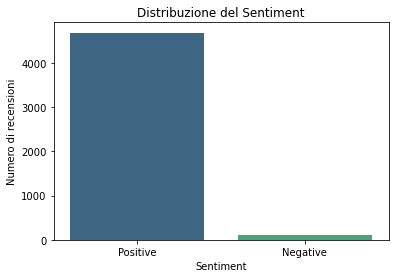

In [72]:
# Visualizzazione della distribuzione del Sentiment
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Distribuzione del Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Numero di recensioni')
plt.show()

In [73]:
features.append('Cleaned_Review')
features.append('Sentiment')


In [74]:
features

['reviews.text', 'reviews.rating', 'label', 'Cleaned_Review', 'Sentiment']

In [75]:
from bs4 import BeautifulSoup
# Let convert the review in lower case 
data["pre_process"]=data[features[3]].apply(lambda x :str(x).lower())
# Lets remove the HTML tags and URL from Review_body 
data["pre_process"]=data["pre_process"].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [76]:
data

,reviews.text,reviews.rating,label,Cleaned_Review,Sentiment,pre_process
1,This kindle is light and easy to use especiall...,5,1,kindle is light and easy to use especially at ...,Positive,kindle is light and easy to use especially at ...
2,Didnt know how much i'd use a kindle so went f...,4,1,know how much id use a kindle so went for the ...,Positive,know how much id use a kindle so went for the ...
3,I am 100 happy with my purchase. I caught it o...,5,1,am 100 happy with my purchase i caught it on s...,Positive,am 100 happy with my purchase i caught it on s...
4,Solid entry level Kindle. Great for kids. Gift...,5,1,entry level kindle great for kids gifted for a...,Positive,entry level kindle great for kids gifted for a...
5,This make an excellent ebook reader. Don't exp...,5,1,make an excellent ebook reader dont expect muc...,Positive,make an excellent ebook reader dont expect muc...
...,...,...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1,is a great tablet for the price amazon is doin...,Positive,is a great tablet for the price amazon is doin...
4996,This tablet is the perfect size and so easy to...,5,1,tablet is the perfect size and so easy to use ...,Positive,tablet is the perfect size and so easy to use ...
4997,Purchased this for my son. Has room to upgrade...,4,1,this for my son has room to upgrade memory to ...,Positive,this for my son has room to upgrade memory to ...
4998,I had some thoughts about getting this for a 5...,5,1,had some thoughts about getting this for a 5 y...,Positive,had some thoughts about getting this for a 5 y...


In [77]:
# Now it time to covert the works like can't to can not 
def contraction(s):
    s=re.sub(r"won't","will not",s)
    s=re.sub(r"would't","would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s= re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"doesn't", "does not",s)
    return s
data["pre_process"]=data["pre_process"].apply(lambda x:(contraction(x)))

In [78]:
data

,reviews.text,reviews.rating,label,Cleaned_Review,Sentiment,pre_process
1,This kindle is light and easy to use especiall...,5,1,kindle is light and easy to use especially at ...,Positive,kindle is light and easy to use especially at ...
2,Didnt know how much i'd use a kindle so went f...,4,1,know how much id use a kindle so went for the ...,Positive,know how much id use a kindle so went for the ...
3,I am 100 happy with my purchase. I caught it o...,5,1,am 100 happy with my purchase i caught it on s...,Positive,am 100 happy with my purchase i caught it on s...
4,Solid entry level Kindle. Great for kids. Gift...,5,1,entry level kindle great for kids gifted for a...,Positive,entry level kindle great for kids gifted for a...
5,This make an excellent ebook reader. Don't exp...,5,1,make an excellent ebook reader dont expect muc...,Positive,make an excellent ebook reader dont expect muc...
...,...,...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1,is a great tablet for the price amazon is doin...,Positive,is a great tablet for the price amazon is doin...
4996,This tablet is the perfect size and so easy to...,5,1,tablet is the perfect size and so easy to use ...,Positive,tablet is the perfect size and so easy to use ...
4997,Purchased this for my son. Has room to upgrade...,4,1,this for my son has room to upgrade memory to ...,Positive,this for my son has room to upgrade memory to ...
4998,I had some thoughts about getting this for a 5...,5,1,had some thoughts about getting this for a 5 y...,Positive,had some thoughts about getting this for a 5 y...


In [79]:
# Lets remove the alphanumeric text 
data["pre_process"]=data["pre_process"].apply(lambda x:" ".join([re.sub('[^A-Za-z]+','',x) for x in nltk.word_tokenize(x)]))

In [80]:
data

,reviews.text,reviews.rating,label,Cleaned_Review,Sentiment,pre_process
1,This kindle is light and easy to use especiall...,5,1,kindle is light and easy to use especially at ...,Positive,kindle is light and easy to use especially at ...
2,Didnt know how much i'd use a kindle so went f...,4,1,know how much id use a kindle so went for the ...,Positive,know how much id use a kindle so went for the ...
3,I am 100 happy with my purchase. I caught it o...,5,1,am 100 happy with my purchase i caught it on s...,Positive,am happy with my purchase i caught it on sale...
4,Solid entry level Kindle. Great for kids. Gift...,5,1,entry level kindle great for kids gifted for a...,Positive,entry level kindle great for kids gifted for a...
5,This make an excellent ebook reader. Don't exp...,5,1,make an excellent ebook reader dont expect muc...,Positive,make an excellent ebook reader dont expect muc...
...,...,...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1,is a great tablet for the price amazon is doin...,Positive,is a great tablet for the price amazon is doin...
4996,This tablet is the perfect size and so easy to...,5,1,tablet is the perfect size and so easy to use ...,Positive,tablet is the perfect size and so easy to use ...
4997,Purchased this for my son. Has room to upgrade...,4,1,this for my son has room to upgrade memory to ...,Positive,this for my son has room to upgrade memory to ...
4998,I had some thoughts about getting this for a 5...,5,1,had some thoughts about getting this for a 5 y...,Positive,had some thoughts about getting this for a ye...


In [81]:
# Lets remove the stopwords 
from nltk.corpus import stopwords
stop=stopwords.words("english")
data["pre_process"]=data["pre_process"].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [82]:
data

,reviews.text,reviews.rating,label,Cleaned_Review,Sentiment,pre_process
1,This kindle is light and easy to use especiall...,5,1,kindle is light and easy to use especially at ...,Positive,kindle light easy use especially beach
2,Didnt know how much i'd use a kindle so went f...,4,1,know how much id use a kindle so went for the ...,Positive,know much id use kindle went lower end im happ...
3,I am 100 happy with my purchase. I caught it o...,5,1,am 100 happy with my purchase i caught it on s...,Positive,happy purchase caught sale really good price n...
4,Solid entry level Kindle. Great for kids. Gift...,5,1,entry level kindle great for kids gifted for a...,Positive,entry level kindle great kids gifted kid frien...
5,This make an excellent ebook reader. Don't exp...,5,1,make an excellent ebook reader dont expect muc...,Positive,make excellent ebook reader dont expect much d...
...,...,...,...,...,...,...
4995,This is a great tablet for the price. Amazon i...,5,1,is a great tablet for the price amazon is doin...,Positive,great tablet price amazon good job
4996,This tablet is the perfect size and so easy to...,5,1,tablet is the perfect size and so easy to use ...,Positive,tablet perfect size easy use read play games p...
4997,Purchased this for my son. Has room to upgrade...,4,1,this for my son has room to upgrade memory to ...,Positive,son room upgrade memory allow books games spea...
4998,I had some thoughts about getting this for a 5...,5,1,had some thoughts about getting this for a 5 y...,Positive,thoughts getting year old get screen protector...


In [84]:
# Let's Lemmatize 
!pip install nltk
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
data["pre_process"]=data["pre_process"].apply(lambda x:" ".join([lemma.lemmatize(x)for x in nltk.word_tokenize(x)]))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\39348/nltk_data'
    - 'C:\\Users\\39348\\anaconda3\\nltk_data'
    - 'C:\\Users\\39348\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\39348\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\39348\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [85]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words and TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
X_train ,X_test,Y_train,Y_test=train_test_split(data["pre_process"],data["label"],test_size=0.3,random_state=10)
print("Train Size: ",X_train.shape,Y_train.shape,"   Test Size: ",(X_test.shape,Y_test.shape))

Train Size:  (3362,) (3362,)    Test Size:  ((1441,), (1441,))


In [87]:
# Using TF-IDF vector for word embedding 
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,solver="saga")

In [89]:
model.fit(tf_x_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [90]:
# Predicting of unseen test data set
y_pred=model.predict(tf_x_test)

In [92]:
from sklearn import metrics
print("Accuracy for test data : ",round(metrics.accuracy_score(Y_test,y_pred),4)*100)

Accuracy for test data :  97.71


In [93]:
cm=metrics.confusion_matrix(Y_test,y_pred)
cm

array([[   0,   33],
       [   0, 1408]], dtype=int64)

Text(33.0, 0.5, 'Actual label')

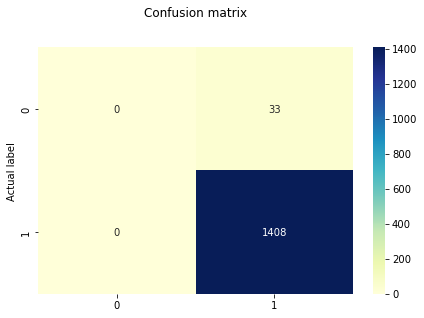

In [94]:
# confusion Matrics with visualization
class_names=['Positive_review','Negative_review']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')